**<font color=skyblue>主成分分析的初步實驗（Principal Component Analysis Experiment）</font>**

- 透過知名資料集來實驗主成分分析（PCA）的原理與應用。
- 了解 PCA 如何將高維資料投影到較低維的空間，同時保留資料的主要變異性。
- 了解 PCA 的應用場景與應用範例。


參考講義：https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/


<hr>
<font color=yellow>範例 1 </font>

RandMcNally Places Rated Almanac 提供了一組美國城市生活品質的調查資料，含 329 個城市的 9 個評量項目的分數。我們可以這些數字裡看到什麼訊息？如何觀察這麼多(9×329)數字資料？能藉助哪些統計圖與表呢？又該計算哪些統計量呢？主成分分析能幫上甚麼忙呢？

Data: https://ntpuccw.blog/wp-content/uploads/2023/02/city_quality.xlsx

<hr>

Importing necessary packages:

In [2]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler

1. 首先讀取資料檔案

In [3]:
df = pd.read_excel('data/city_quality.xlsx')
df.head() # first 5 rows
# df.shape # dimensions
# df.info() # data types, missing values
# df.describe() # summary statistics

,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


2. 繪製統計圖：透過圖形來觀察資料的全貌，譬如每個評比項目的盒鬚圖（Box plot）與項目間的相關性矩陣圖（Correlation matrix ）。

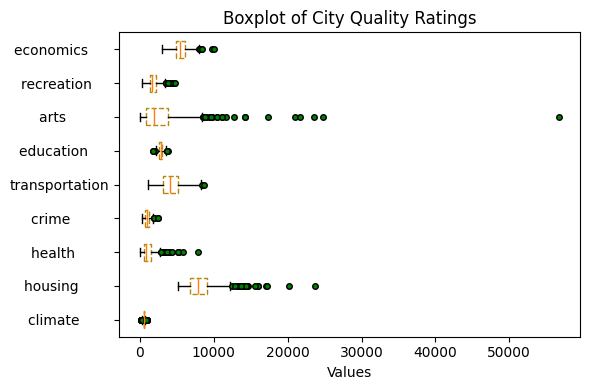

In [4]:
ratings = np.array(df)
categories = df.columns

fig, ax = plt.subplots(figsize = (6, 4))
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, \
    tick_labels=categories, vert = False)
ax.set_xlabel('Values')
ax.set_title('Boxplot of City Quality Ratings')
plt.tight_layout()
plt.show()

3. 修正資料矩陣（if necessary），譬如標準化（Normalization）。並回答下列問題

- 資料需要標準化的理由是 ...
- 資料矩陣若不標準化，會發生甚麼問題 ...
- 資料如何標準化 ...

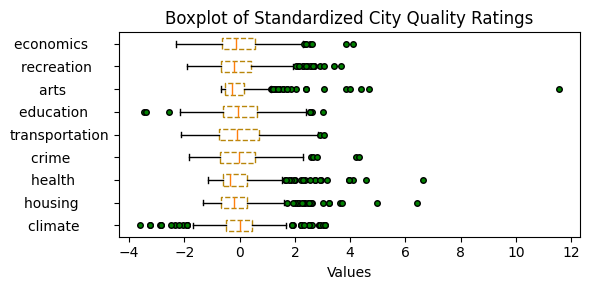

In [5]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply standardization to dataset.
ratings_ = scaler.transform(ratings)

fig, ax = plt.subplots(figsize = (6, 3))
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

ax.boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = categories, vert = False)
ax.set_xlabel('Values')
ax.set_title('Boxplot of Standardized City Quality Ratings')
plt.tight_layout()
plt.show()

繪製相關性矩陣圖並回答下列問題

- 相關性矩陣圖有甚麼用？
- 與主成分分析的關係？

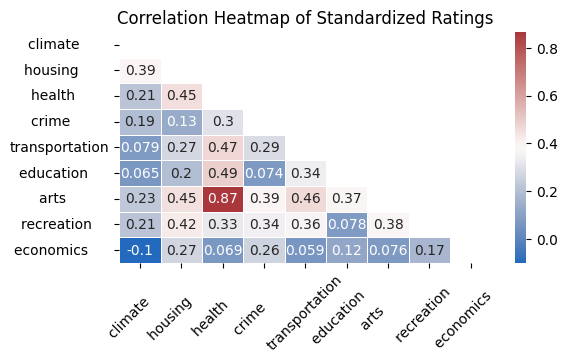

In [6]:
fig, ax = plt.subplots(figsize = (6, 3))
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap of Standardized Ratings')
# setting heatmap properties
# cmap = seaborn.color_palette('vlag', as_cmap = True)
# mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask 
# cbar_kws = dict({'shrink': 0.5})
# annot_kws = dict({'ha': 'center', 'va': 'center', 'size': 8})
# seaborn.heatmap(R, annot = True, annot_kws = annot_kws, mask = mask,\
#             cmap = cmap, center = 0, square = True,\
#             linewidths = .5, cbar_kws=cbar_kws)
plt.show()

4. 主成分分析

- 想達到甚麼目的？如何判斷是否達到目的？
- 通常會觀察甚麼圖？代表甚麼意思？
- 通常會觀察那些數據？這些數據的意義？

PCA 套件手冊：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

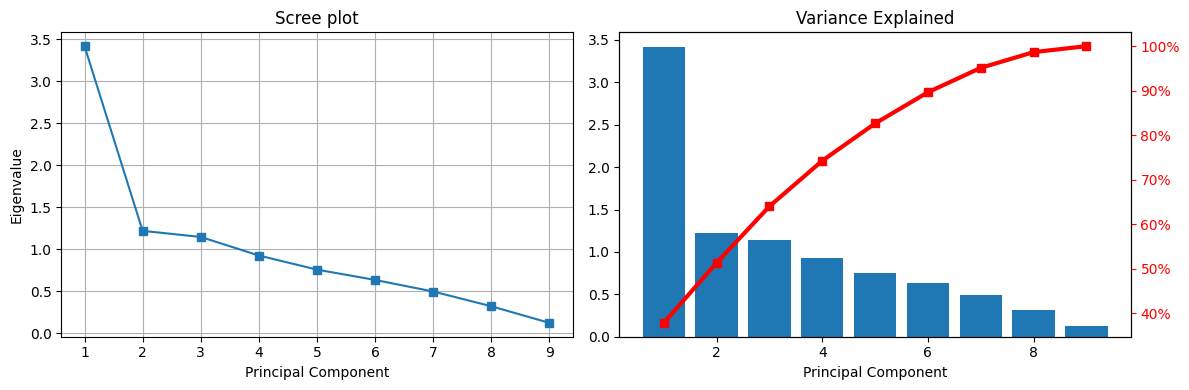

In [7]:

# Note that the data is already standardized, so we can directly apply PCA to ratings_.
pca = PCA().fit(ratings_)
# print(pca.explained_variance_ratio_) # ratio of eigenvalues
# print(pca.explained_variance_) # eigenvalues of sample covariance matrix
# print(pca.components_)  # eigenvectors
# print(pca.mean_) # mean vector of data matrix X

eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()

觀察主成分的"樣子"，並查證理論的說法（加強對理論的了解）

- 看得出（算得出）主成分的獨立性？
- 原變數的變異數和 = 主成分之變異數和，即總變異不變，即訊息量（能量）不變。
- 變異數和代表甚麼？

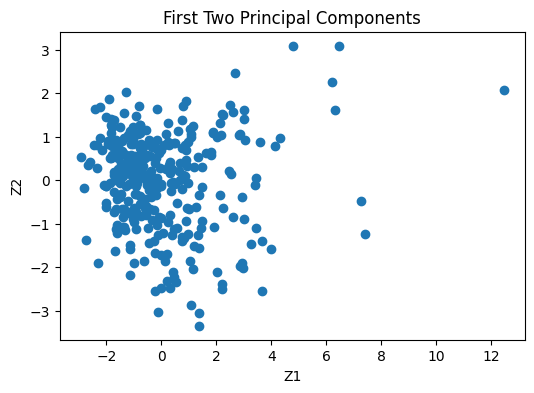

Sum of the variances of original variables: 9.027439024390244
Total variance explained by all principal components: 9.02743902439024
Sum of the eigenvalues: 9.02743902439024
Inner product of Z1 and Z2: -1.7053025658242404e-13


In [8]:
# Show thw first two components Z1, Z2
Z = pca.transform(ratings_)
plt.figure(figsize=(6, 4))
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('First Two Principal Components')
plt.show()

# 原變數之變異數和 = 主成分之變異數和

print('Sum of the variances of original variables:', \
      np.diag(np.cov(ratings_.T)).sum())
print('Total variance explained by all principal components:', \
      pca.explained_variance_.sum())
print('Sum of the eigenvalues:', eigvals.sum())
# compute the inner product of Z1 and Z2
print('Inner product of Z1 and Z2:', np.dot(Z[:,0], Z[:,1]))

每個主成分與原變數間的組合關係
- 組合係數從何而來？
- 從組合係數能看出甚麼？

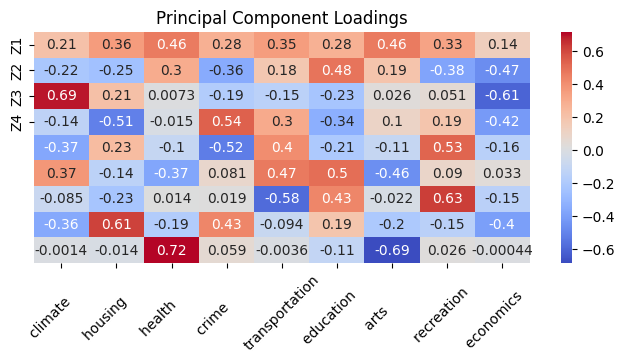

In [14]:
ylabels = ['Z1', 'Z2', 'Z3', 'Z4']
plt.figure(figsize=(8, 3))
seaborn.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df.columns, yticklabels=ylabels)
plt.xticks(rotation=45)
plt.title('Principal Component Loadings')
plt.show()


<font color=orange>結論：、、、</font>



<hr>
<font color=yellow>範例 2 </font>

G. P. Frets 在 1921 主持一項名為 “Heredity of Head Form in Man” （男人頭顱形狀的遺傳研究）的實驗。該研究蒐集了來自 25 的家庭的長子與次子的頭顱長度（head length）與 寬度（head breadth）。研究目的為：

- 身體特徵——特別是頭型——是如何遺傳的。
- 兄弟姊妹之間是否會呈現相似的顱部尺寸。
- 頭部形態在家族成員之間的相關程度有多強。

本範例想從 PCA 的角度來探討上述的問題。

資料下載：https://ntpuccw.blog/wp-content/uploads/2024/01/data_son_football.zip 解壓縮後取 son.txt

<hr>

Load data

- Head_length(1st son): X1
- Head_Breadth(1st son): X2
- Head_length(2nd son): Y1
- Head_Breadth(2nd son): Y2

In [16]:
D = np.loadtxt('data/son.txt', comments='%')
# X = D[:, 0:2]
df = pd.DataFrame(D, columns=['X1', 'X2', 'Y1', 'Y2'])
df.head()

,X1,X2,Y1,Y2
0,191.0,155.0,179.0,145.0
1,195.0,149.0,201.0,152.0
2,181.0,148.0,185.0,149.0
3,183.0,153.0,188.0,149.0
4,176.0,144.0,171.0,142.0


觀察甚麼統計圖形才有幫助：

- Boxplot
- Correlation matrix
- Scatter plot between two(all) variables

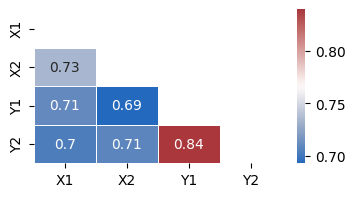

In [19]:
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
fig, ax = plt.subplots(figsize=(4, 2))
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5, ax=ax)
plt.show()

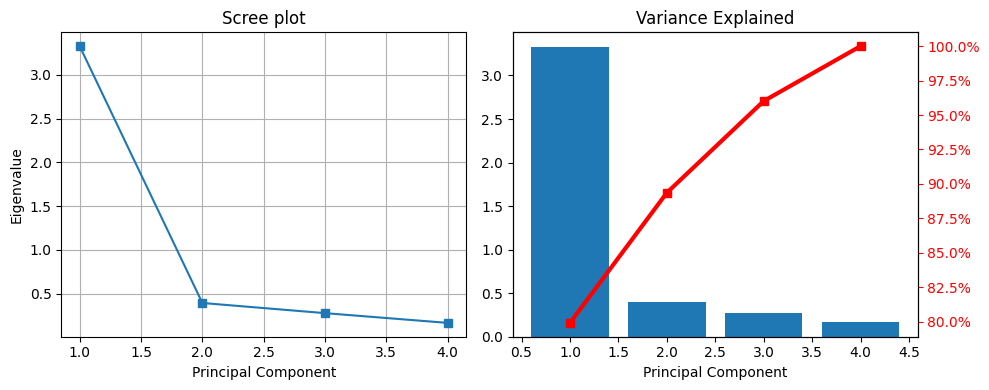

[0.79902672 0.0944877  0.06659746 0.03988812]


In [20]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df.values)
# Apply standardization to dataset.
df_scaled = scaler.transform(df.values)
pca = PCA().fit(df_scaled)

eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_) # ratio of eigenvalues


主成分是原始變數的重組，依"訊息量"遞減。能量高的成分代表原始資料的特徵最明顯

1. 觀察"訊息量"最大的主成分 Z1 的組合
1. 觀察"訊息量"次大的主成分 Z2 的組合

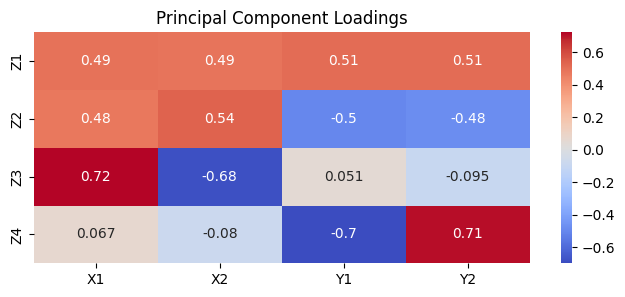

In [11]:
ylabels = ['Z1', 'Z2', 'Z3', 'Z4']
plt.figure(figsize=(8, 3))
seaborn.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df.columns, yticklabels=ylabels)
plt.title('Principal Component Loadings')
plt.show()

觀察與推論：

1. Z1 = 0.49X1 + 0.49Y1 + 0.51X2 + 0.51Y2
    - 家庭之間的差異主要體現在整體顱部大小上。
    - 體型較大的長子往往會有體型較大的次子。
    - 頭長與頭寬通常會一起增加。


1. Z2 = (0.48X1 - 0.5Y1) + (0.54X2 - 48Y2)
    - 部分家族呈現長而窄的頭型 — 這通常反映遺傳上偏向顱長較大、顱寬較小的組合。
    - 另一些家族則呈現短而寬的頭型 — 顱長較短、顱寬較大，使頭型更趨向橢圓或圓形。
    - 這種差異屬於形態維度，而非尺寸差異 — 也就是說，即使兩個人的頭部大小相同，他們仍可能在「長 vs. 寬」的比例上呈現不同的形態型態。



看看前兩個主成分的散佈圖

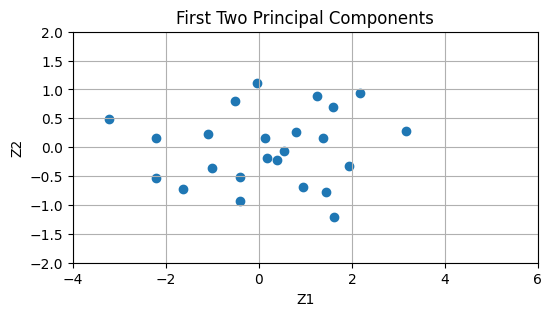

In [12]:
# Show thw first two components Z1, Z2
Z = pca.transform(df_scaled)[:, :2]
plt.figure(figsize=(6, 3))
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('First Two Principal Components')
plt.xlim(-4, 6)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

<font color=orange>結論：、、、</font>



<hr>

<font color=yellow>範例 3</font>：按前述範例自行探討本範例

一組「60 名美國大學 football 球員的六項頭圍數據」，來自一項頭部尺寸與美式足球安全性相關的初步研究。研究的核心目的為了了解不同球員的頭型特徵，並評估這些特徵是否與頭盔貼合度、衝擊力傳遞方式，以及可能造成的頸部傷害風險有關。六項數據包括：

- WDIM: head width at widest dimension 頭部寬度
- CIRCUM:head circumference 頭圍
- FBEYE:front-to-back measurement at eye level 前後長度
- EYEHD:eye-to-top-of-head measurement 眼到頭頂距離
- EARHD:ear-to-top-of-headmeasurement 耳到頭頂距離
- JAW:jaw width - 下顎寬度

如何用 PCA 分析這組資料？能得出甚麼訊息？

資料下載：同前範例，但開啟 FOOTBALL.txt



<hr>
<font color=yellow>範例 4：小麥種子資料集（Seeds Dataset）</font>：群組資料

- 來源：UCI Machine Learning Repository 的 Seeds Dataset
- 數量：210 筆觀測
- 特徵：7 個與小麥種子（kernel）形狀相關的幾何量測
- 品種：Kama、Rosa、Canadian 三種小麥


7 個與小麥種子（kernel）形狀相關的幾何量測：
- Area 面積
- Perimeter 周長
- Compactness 緊湊性
- Length of kernel 核心長度
- Width of kernel 核心寬度
- Asymmetry coefficient 不對稱係數
- Length of kernel groove 核心溝槽長度


資料來源：https://archive.ics.uci.edu/dataset/236/seeds
<hr>

In [24]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv('data/seeds_dataset.txt', names = cols, sep=r'\s+')
# df.head()
df.tail()

,area,perimeter,compactness,length,width,asymmetry,groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [25]:
# exclude the class label
# assign the last column as labels
labels = df.iloc[:, -1] # class labels
df = df.iloc[:, :-1] # exclude the class label
attributes = df.columns # attribute names

繪製 Boxplot：觀察資料是否需標準化？

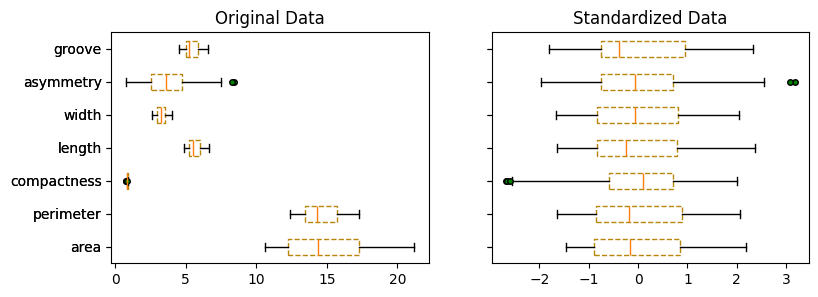

In [26]:
# standardize the data
scaler = StandardScaler()
scaler.fit(df.values)
df_scaled = scaler.transform(df.values)

fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

# two boxplots share the same y-axis
ax[0].boxplot(df.values, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = attributes, vert = False)
ax[0].set_title('Original Data')

ax[1].boxplot(df_scaled, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = attributes, vert = False)
ax[1].set_title('Standardized Data')
plt.show()

繪製相關係數矩陣（for what?）

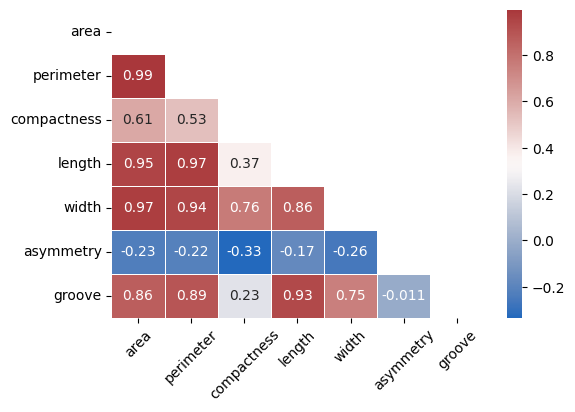

In [29]:
plt.figure(figsize = (6, 4))
R = df.corr() # corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

執行 PCA 並繪製相關圖形（for what?）

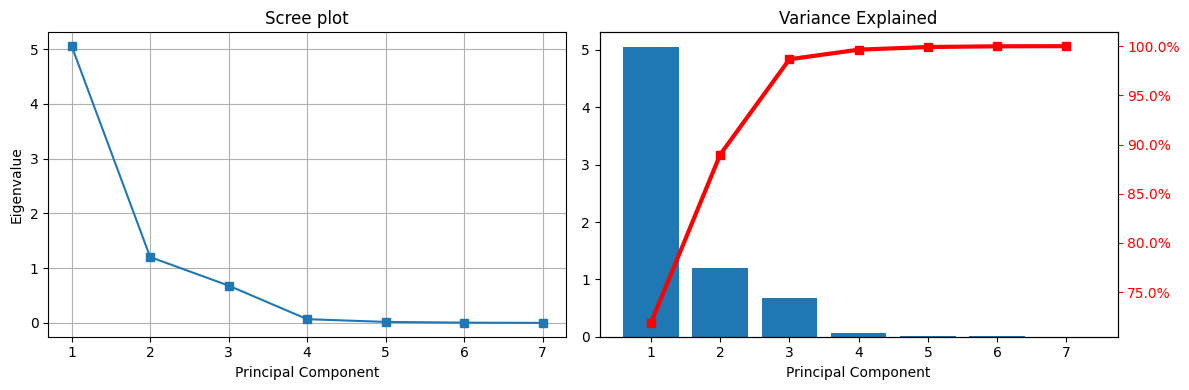

[7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]


In [31]:
pca = PCA().fit(df_scaled)
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_) # ratio of eigenvalues

觀察主成分與群組的關係
- 若欲進行群組分析（classification or cluster analysis），可以採取 7 個原變數或兩個主成分，哪個方式會比較好呢？是否也可以考慮一個主成分或三個主成分？這是個開放性的問題，唯有深入實驗才能得出結論。
- 可以嘗試畫三個主成分的立體散佈圖。

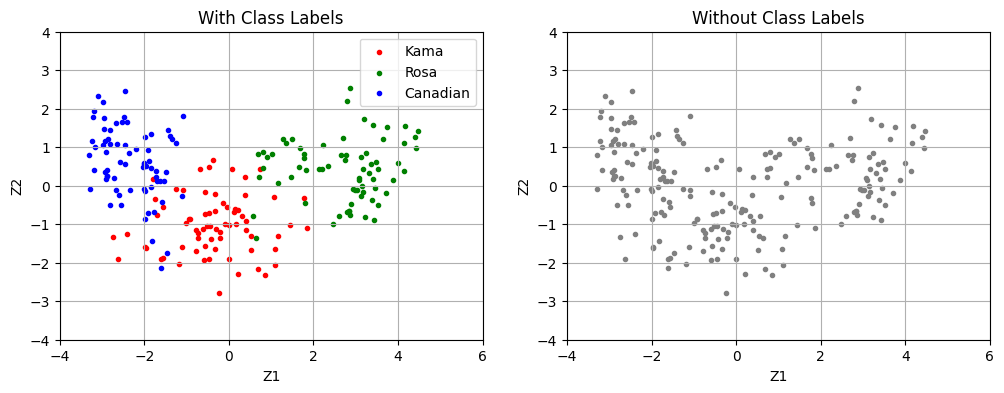

In [34]:
Z = pca.transform(df_scaled)[:, :2]
classes = ['Kama', 'Rosa', 'Canadian']
colors = ['red', 'green', 'blue']
# Show the first two principal components Z1, Z2 with and without class labels in the same figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i in np.arange(1, 4):
    ax[0].scatter(Z[labels == i, 0], Z[labels == i, 1], \
                marker='.', color=colors[i-1], label=classes[i-1])
ax[0].set_xlabel('Z1')
ax[0].set_ylabel('Z2')
ax[0].set_title('With Class Labels')
ax[0].set_xlim(-4, 6)
ax[0].set_ylim(-4, 4)
ax[0].grid(True)
ax[0].legend()
ax[1].scatter(Z[:,0], Z[:,1], marker='.', color='gray')
ax[1].set_xlabel('Z1')
ax[1].set_ylabel('Z2')
ax[1].set_title('Without Class Labels')
ax[1].set_xlim(-4, 6)
ax[1].set_ylim(-4, 4)
ax[1].grid(True)
plt.show()

主成分的組合係數：能否推論出甚麼？

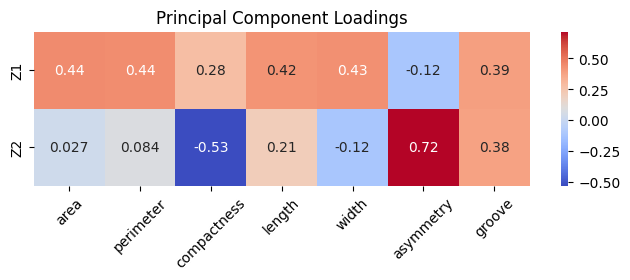

In [35]:
# plot the loadings of the first two principal components
ylabels = ['Z1', 'Z2']
plt.figure(figsize=(8, 2))
seaborn.heatmap(pca.components_[:2], cmap='coolwarm', annot=True, xticklabels=df.columns, yticklabels=ylabels)
# skew the x-axis to show the loadings more clearly
plt.xticks(rotation=45)
plt.title('Principal Component Loadings')
plt.show()

<hr>
<font color=yellow>範例 5：紅酒資料集</font>：群組資料的主成分分析

- 來源：UCI Machine Learning Repository 的 Wine Dataset
- 數量：178 筆觀測
- 特徵：13 種化學成分
- 品種：3 個產區

參考：https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/ 習題 1
<hr>
